**📈 Data Analysis On Pakistan Ecommerce Dataset 🚀**

The largest analysis of retail e-commerce orders dataset from Pakistan, covering a time span from March 2016 to August 2018. It consists of half a million transaction records, collected from various e-commerce merchants as part of a research study.

In [3]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.0 MB/s eta 0:00:00


In [4]:
# Data manipulation libraries
import pandas as pd
import numpy as np
from scipy import stats
import missingno as msno
import logging
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model libraries
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To ensure that plots are displayed inline in jupyter notebook
%matplotlib inline

# remove warnings
import warnings
warnings.simplefilter('ignore')

**Data Loading**

In [5]:
data = pd.read_csv('/content/Pakistan Largest Ecommerce Dataset.csv')

**Data Exploration 🔍**

In [6]:
# Display the first few rows
data.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


**Checking Shape Of Data**

In [8]:
print(f'Number of rows : {data.shape[0]}')
print(f'Number of columns : {data.shape[1]}')

Number of rows : 1048575
Number of columns : 26


In [9]:
# Columns
data.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [10]:
# Checking the dtypes of Columns
data.dtypes

,0
item_id,float64
status,object
created_at,object
sku,object
price,float64
qty_ordered,float64
grand_total,float64
increment_id,object
category_name_1,object
sales_commission_code,object


**By default, pandas stores all columns as float or object. However, our dataset contains a mix of data types, including categorical, integer, and datetime values.
During the data cleaning process, I will explicitly convert each column to its appropriate data type. This step ensures memory optimization, improves processing efficiency, and allows for accurate analysis.**

In [11]:
# info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

**Observation
Total Rows: 1,048,575
Valid entries in key columns: 584,524
Empty Columns: Unnamed_21 - Unnamed_25
Datetime Attributes: Working Date, created_at, Year, Month, M-Y, FY, & Customer Since
Categorical Attributes: status, sales_commission_code, sku, payment_method, category_name_1 & BI Status
Numerical Keys: price, qty_ordered, Customer ID, increment_id, grand_total, item_id, MV & discount_amount**

**Statistical summary**

In [12]:
# Set Pandas to display numbers without scientific notation
pd.set_option('display.float_format', '{:.0f}'.format)

# summary statistics
data.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,584524,584524,584524,584524,584524,584524,584524,584513,0,0,0,0,0
mean,565667,6349,1,8531,499,2017,7,45791,NaN,NaN,NaN,NaN,NaN
std,200121,14949,4,61321,1507,1,3,34415,NaN,NaN,NaN,NaN,NaN
min,211131,0,1,-1594,-600,2016,1,1,NaN,NaN,NaN,NaN,NaN
25%,395001,360,1,945,0,2017,4,13516,NaN,NaN,NaN,NaN,NaN
50%,568424,899,1,1960,0,2017,7,42856,NaN,NaN,NaN,NaN,NaN
75%,739106,4070,1,6999,160,2018,11,73536,NaN,NaN,NaN,NaN,NaN
max,905208,1012626,1000,17888000,90300,2018,12,115326,NaN,NaN,NaN,NaN,NaN


In [13]:
def analyze_missing_values(data, show_all=False):
    """
    Analyze and visualize missing values in a pandas DataFrame.

    Parameters:
    -----------
    df : pd.DataFrame
        The DataFrame to analyze.
    show_all : bool, optional (default=False)
        Whether to show all columns in the summary (including non-missing).

    Returns:
    --------
    pd.DataFrame
        A DataFrame summarizing missing values per column.
    """

    # Calculate missing values
    missing_data = (
        data.isnull()
        .sum()
        .to_frame(name='Missing Values')
        .assign(
            Percentage=lambda x: (x['Missing Values'] / len(data)) * 100
        )
        .sort_values('Missing Values', ascending=False)
    )

    if not show_all:
        missing_data = missing_data[missing_data['Missing Values'] > 0]

    # Format percentage
    missing_data['Percentage'] = missing_data['Percentage'].map('{:.2f}%'.format)

    # Display table
    print("🧾 Missing Value Summary:")
    display(missing_data)

    # --- Visualizations ---
    if not missing_data.empty:
        # Barplot
        plt.figure(figsize=(10, 6))
        sns.barplot(
            x=missing_data.index,
            y=missing_data['Missing Values'].values,
            palette='Reds_r'
        )
        plt.title('Missing Values per Column')
        plt.xlabel('Column Name')
        plt.ylabel('Count of Missing Values')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        print("=================================================================")
        # Heatmap
        msno.heatmap(data, figsize=(10, 6))
        plt.title('Missing Data Heatmap')
        plt.show()
    else:
        print("✅ No missing values found in the dataset!")

    return missing_data

🧾 Missing Value Summary:


,Missing Values,Percentage
Unnamed: 23,1048575,100.00%
Unnamed: 22,1048575,100.00%
Unnamed: 25,1048575,100.00%
Unnamed: 24,1048575,100.00%
Unnamed: 21,1048575,100.00%
sales_commission_code,601229,57.34%
category_name_1,464215,44.27%
sku,464071,44.26%
status,464066,44.26%
Customer Since,464062,44.26%


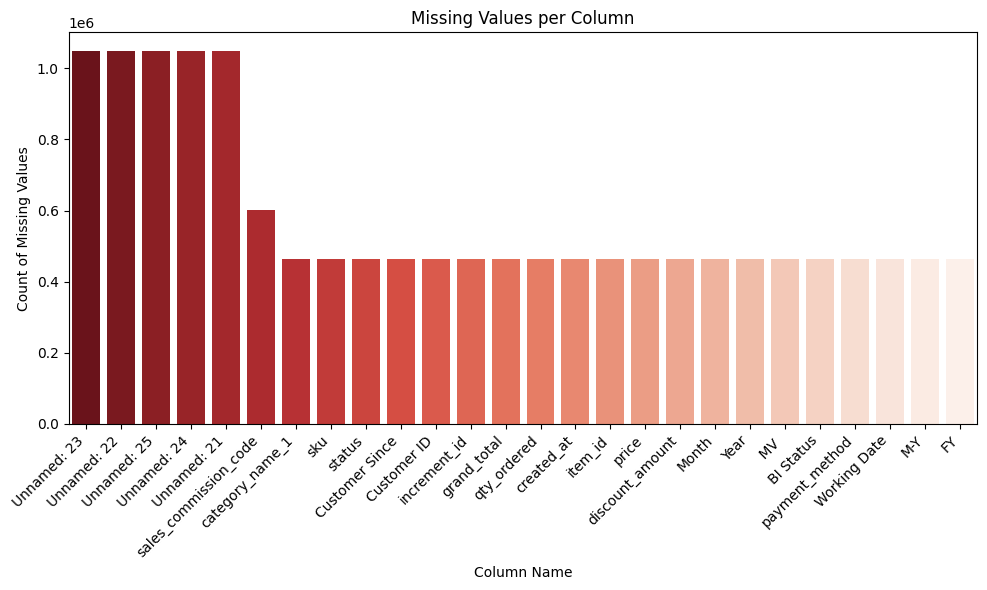

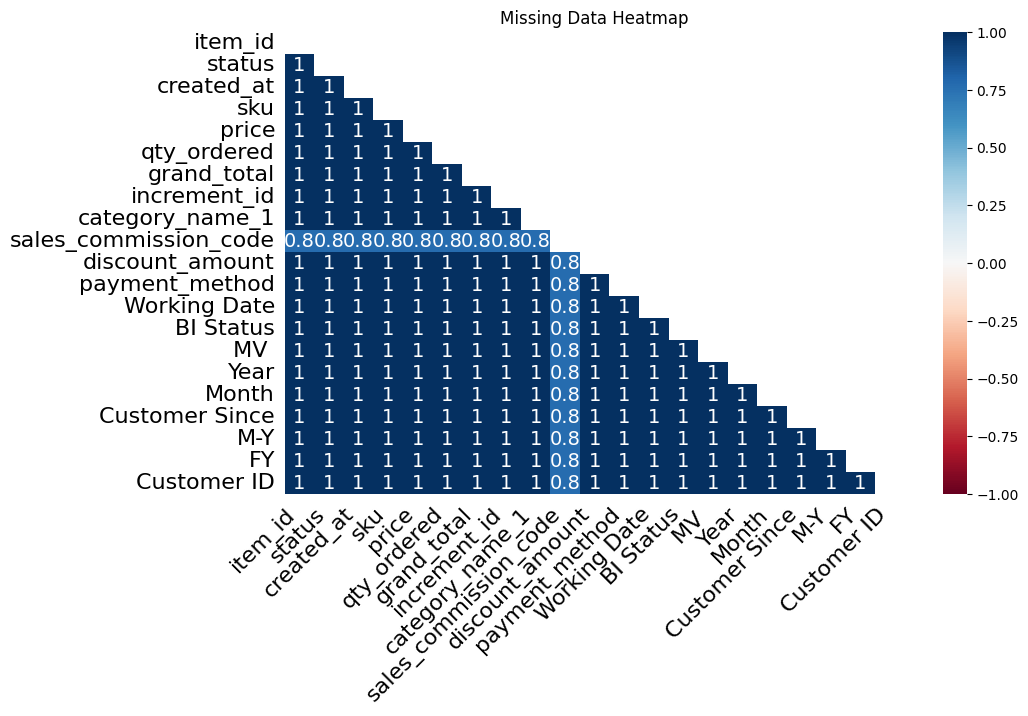

In [14]:
summary = analyze_missing_values(data, show_all=True)

**Columns with high missing percentages or unrelated information will be removed
Rows with all missing values or excessive missing data will be dropped
Missing values in important columns may be handled using appropriate imputation techniques**

**Checking Duplicates**

In [15]:
# Check if there are any duplicate rows
duplicates = data.duplicated()

# Count of total duplicates
total_duplicates = data.duplicated().sum()

print(f"Total number of duplicate rows in the data: {total_duplicates}")

Total number of duplicate rows in the data: 464050


In [17]:
def extract_unique_values(data, columns):
    unique_frames = []

    for col in columns:
        # Sanitize column name for use as new column
        clean_col_name = f'unique_{col.strip().replace(" ", "_")}'
        unique_vals = pd.DataFrame({clean_col_name: data[col].dropna().unique()})
        unique_frames.append(unique_vals)

    # Concatenate all unique value DataFrames side-by-side and fill NaN with blank
    merged_data = pd.concat(unique_frames, axis=1).fillna('')

    return merged_data

In [18]:
columns_to_check = ['status', 'payment_method', 'category_name_1', 'BI Status']
unique_summary = extract_unique_values(data, columns_to_check)

# Display the result
display(unique_summary)


,unique_status,unique_payment_method,unique_category_name_1,unique_BI_Status
0,complete,cod,Women's Fashion,#REF!
1,canceled,ublcreditcard,Beauty & Grooming,Gross
2,order_refunded,mygateway,Soghaat,Net
3,received,customercredit,Mobiles & Tablets,Valid
4,refund,cashatdoorstep,Appliances,
5,closed,mcblite,Home & Living,
6,fraud,internetbanking,Men's Fashion,
7,holded,marketingexpense,Kids & Baby,
8,exchange,productcredit,\N,
9,pending_paypal,financesettlement,Others,


**We have successfully completed the Data Exploration phase. Now, it's time to move forward into the Data Cleaning process.**

> **Data Cleaning**

In [19]:
# remove Unnecessary columns
data.drop(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1, inplace=True)
data.shape

(1048575, 21)

In [20]:
# I will drop the 'sales_commission_code' column due to over 50% missing values, as it is not suitable for filling due to its uniqueness
data.drop('sales_commission_code', axis=1, inplace=True)
# We will remove the 'M-Y' column from the dataset, as its information is already represented in the separate 'Year' and 'Month' columns
data.drop('M-Y', axis=1, inplace=True)

print("Successfully dropped 'M-Y' & 'sales_commission_code' columns from the dataset")

Successfully dropped 'M-Y' & 'sales_commission_code' columns from the dataset


In [21]:
data.shape

(1048575, 19)

In [22]:
# Calculate percentage of missing
percentage_missing = (data.isnull().sum() / len(data)) * 100
percentage_missing = percentage_missing.map("{:.0f}%".format)
print('Missing Values Persentage:\n', percentage_missing)

Missing Values Persentage:
 item_id            44%
status             44%
created_at         44%
sku                44%
price              44%
qty_ordered        44%
grand_total        44%
increment_id       44%
category_name_1    44%
discount_amount    44%
payment_method     44%
Working Date       44%
BI Status          44%
 MV                44%
Year               44%
Month              44%
Customer Since     44%
FY                 44%
Customer ID        44%
dtype: object


In [23]:
# Our data has so many rows with entirely NaN values so we have to remove
data.tail(8)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,FY,Customer ID
1048567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# It will remove rows where all records are empty
data.dropna(how='all', inplace=True)
print("Rows with all values NaN have been successfully dropped from the dataset")

Rows with all values NaN have been successfully dropped from the dataset


In [26]:
# now see missing values
data.isnull().sum()

,0
item_id,0
status,15
created_at,0
sku,20
price,0
qty_ordered,0
grand_total,0
increment_id,0
category_name_1,164
discount_amount,0


**Missing Values Imputation**

In [27]:
# Fill missing values in 'status', 'category_name_1', and 'Customer Since' with their respective mode
# because These columns contain categorical data
data['status'].fillna(data['status'].mode()[0], inplace=True)
data['category_name_1'].fillna(data['category_name_1'].mode()[0], inplace=True)
data['Customer Since'].fillna(data['Customer Since'].mode()[0], inplace=True)

# Drop rows where 'sku' or 'Customer ID' have missing values
# becuase 'sku' and 'Customer ID' are unique
data.dropna(subset=['sku', 'Customer ID'], inplace=True)

# Display a message confirming the operation
print("Missing values filled for 'status', 'category_name_1', and 'Customer Since'.")
print()
print("Rows with missing values in 'sku' or 'Customer ID' have been dropped.")

Missing values filled for 'status', 'category_name_1', and 'Customer Since'.

Rows with missing values in 'sku' or 'Customer ID' have been dropped.


In [28]:
# successfully we deal with the missing values
data.isnull().sum()

,0
item_id,0
status,0
created_at,0
sku,0
price,0
qty_ordered,0
grand_total,0
increment_id,0
category_name_1,0
discount_amount,0


In [29]:
print('Shape After Handling Missing Values')
data.shape

Shape After Handling Missing Values


(584493, 19)

**Remove Data Inconsistency**

In [30]:
# Remove 'FY' from the column name FY
data['FY'] = data['FY'].str.replace('FY', '20', regex=True)

# Remove comma from the column name MV
data[' MV '] = data[' MV '].str.replace(',', '', regex=True)

# Remove # and ! from the column name BI Status
data['BI Status'] = data['BI Status'].replace('#', '', regex=True).replace('!', '', regex=True)

print('remove inconsistency from column completed successfully')

remove inconsistency from column completed successfully


In [31]:
# Rename columns with meaningful names
data.rename(columns={
    ' MV ': 'market_value',
    'FY': 'fiscal_year',
    'Year': 'year',
    'Month': 'month',
    'sku': 'stock_keeping_unit',
    'Customer Since': 'customer_since',
    'Customer ID': 'customer_id',
    'category_name_1': 'category_name',
    'BI Status': 'bi_status',
    'Working Date': 'working_date'
}, inplace=True)

print("Rename columns Successfully\n",data.columns)

Rename columns Successfully
 Index(['item_id', 'status', 'created_at', 'stock_keeping_unit', 'price',
       'qty_ordered', 'grand_total', 'increment_id', 'category_name',
       'discount_amount', 'payment_method', 'working_date', 'bi_status',
       'market_value', 'year', 'month', 'customer_since', 'fiscal_year',
       'customer_id'],
      dtype='object')


In [32]:
# Our dataset has \N So Replace '\N' with NaN and fill rows containing NaN values
data.replace('\\N', pd.NA, inplace=True)  # # Our data contains \N, but we write it as \\N to avoid errors
data['category_name']= data['category_name'].fillna(data['category_name'].mode()[0]) # just two column contains \N
data['status']= data['status'].fillna(data['status'].mode()[0])

print('Handle \\N Successfully')

Handle \N Successfully


**Data Type Conversion**

In [33]:
# check datatypes
data.dtypes

,0
item_id,float64
status,object
created_at,object
stock_keeping_unit,object
price,float64
qty_ordered,float64
grand_total,float64
increment_id,object
category_name,object
discount_amount,float64


> # **Data Conversion Optimization**

**Data Time Conversion**

In [34]:
# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Convert and clean datetime columns
try:
    # Convert columns to datetime with coercion of errors
    data['working_date'] = pd.to_datetime(data['created_at'], errors='coerce')
    data['created_at'] = pd.to_datetime(data['customer_since'], errors='coerce')
    data['customer_since'] = pd.to_datetime(data['customer_since'], errors='coerce')

    # Handle missing values by filling with mode
    date_columns = ['working_date', 'created_at', 'customer_since']
    for col in date_columns:
        if data[col].isnull().any():
            mode_value = data[col].mode(dropna=True)[0] if not data[col].mode(dropna=True).empty else pd.Timestamp.now()
            data[col].fillna(mode_value, inplace=True)
            logging.info(f"Missing values in '{col}' filled with mode: {mode_value}")

    logging.info("Datetime conversion and missing value handling completed successfully.")

except KeyError as e:
    logging.error(f"Missing column during datetime conversion: {e}")
except Exception as e:
    logging.exception("An unexpected error occurred during datetime conversion.")


**Categorical Conversion**

In [35]:
# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Convert selected columns to categorical data type
categorical_columns = ['status', 'payment_method', 'category_name', 'bi_status', 'stock_keeping_unit']

try:
    data[categorical_columns] = data[categorical_columns].astype('category')
    logging.info("Categorical type conversion completed successfully.")
except KeyError as e:
    logging.error(f"Column error: {e}. Please ensure all specified columns exist in the DataFrame.")
except Exception as e:
    logging.exception("An unexpected error occurred during categorical conversion.")

**Numerical Conversion**

In [36]:
# Numeric conversion and handle missing values if appears during errors='coerce'

# Convert 'increment_id' to numeric and coerce invalid entries to NaN
# (Invalid entries, like strings, are replaced with NaN using errors='coerce')
data['increment_id'] = pd.to_numeric(data['increment_id'], errors='coerce')

# Drop rows where 'increment_id' is NaN
data.dropna(subset=['increment_id'], inplace=True)
# Convert the column to integer after dropping NaN
data['increment_id'] = data['increment_id'].astype(int)


# Convert price Column to int
data['price']= pd.to_numeric(data['price'], errors='coerce')
data['price']= data['price'].fillna(data['price'].mean()).astype(int)

# Convert qty_ordered column to int
data['qty_ordered'] = pd.to_numeric(data['qty_ordered'], errors='coerce')
data['qty_ordered']= data['qty_ordered'].fillna(data['qty_ordered'].median()).astype(int)

# Convert customer_id column to int
data['customer_id'] = pd.to_numeric(data['customer_id'], errors='coerce')
data.dropna(subset=['customer_id'], inplace=True)
data['customer_id'] = data['customer_id'].astype(int)

# Convert grand_total column to int
data['grand_total']= pd.to_numeric(data['grand_total'], errors='coerce')
data['grand_total']= data['grand_total'].fillna(data['grand_total'].median()).astype(int)

# Convert item_id column to int
data['item_id'] = pd.to_numeric(data['item_id'], errors='coerce')
data.dropna(subset=['item_id'], inplace=True)
data['item_id'] = data['item_id'].astype(int)

# Convert market_value column to int
data['market_value'] = pd.to_numeric(data['market_value'], errors='coerce')
data['market_value']= data['market_value'].fillna(data['market_value'].mean()).astype(int)

# Convert discount_amount column to int
data['discount_amount'] = pd.to_numeric(data['discount_amount'], errors='coerce')
data['discount_amount']= data['discount_amount'].fillna(data['discount_amount'].median()).astype(int)

# Convert year column to int
data['year']= data['year'].astype(int)

# Convert month column to int
data['month']= data['month'].astype(int)

# Convert fiscal_year column to int
data['fiscal_year']= data['fiscal_year'].astype(int)

print("int type conversion and handle missing values if appears process completed successfully")

int type conversion and handle missing values if appears process completed successfully


In [37]:
# let's check
data.dtypes

,0
item_id,int64
status,category
created_at,datetime64[ns]
stock_keeping_unit,category
price,int64
qty_ordered,int64
grand_total,int64
increment_id,int64
category_name,category
discount_amount,int64


**Duplicate Rows**

In [38]:
# Check if there are any duplicate rows
duplicates = data.duplicated()

# Count of total duplicates
total_duplicates = data.duplicated().sum()

print(f"Total number of duplicate rows in the data: {total_duplicates}")

Total number of duplicate rows in the data: 0


> ## **Outlier Detection**

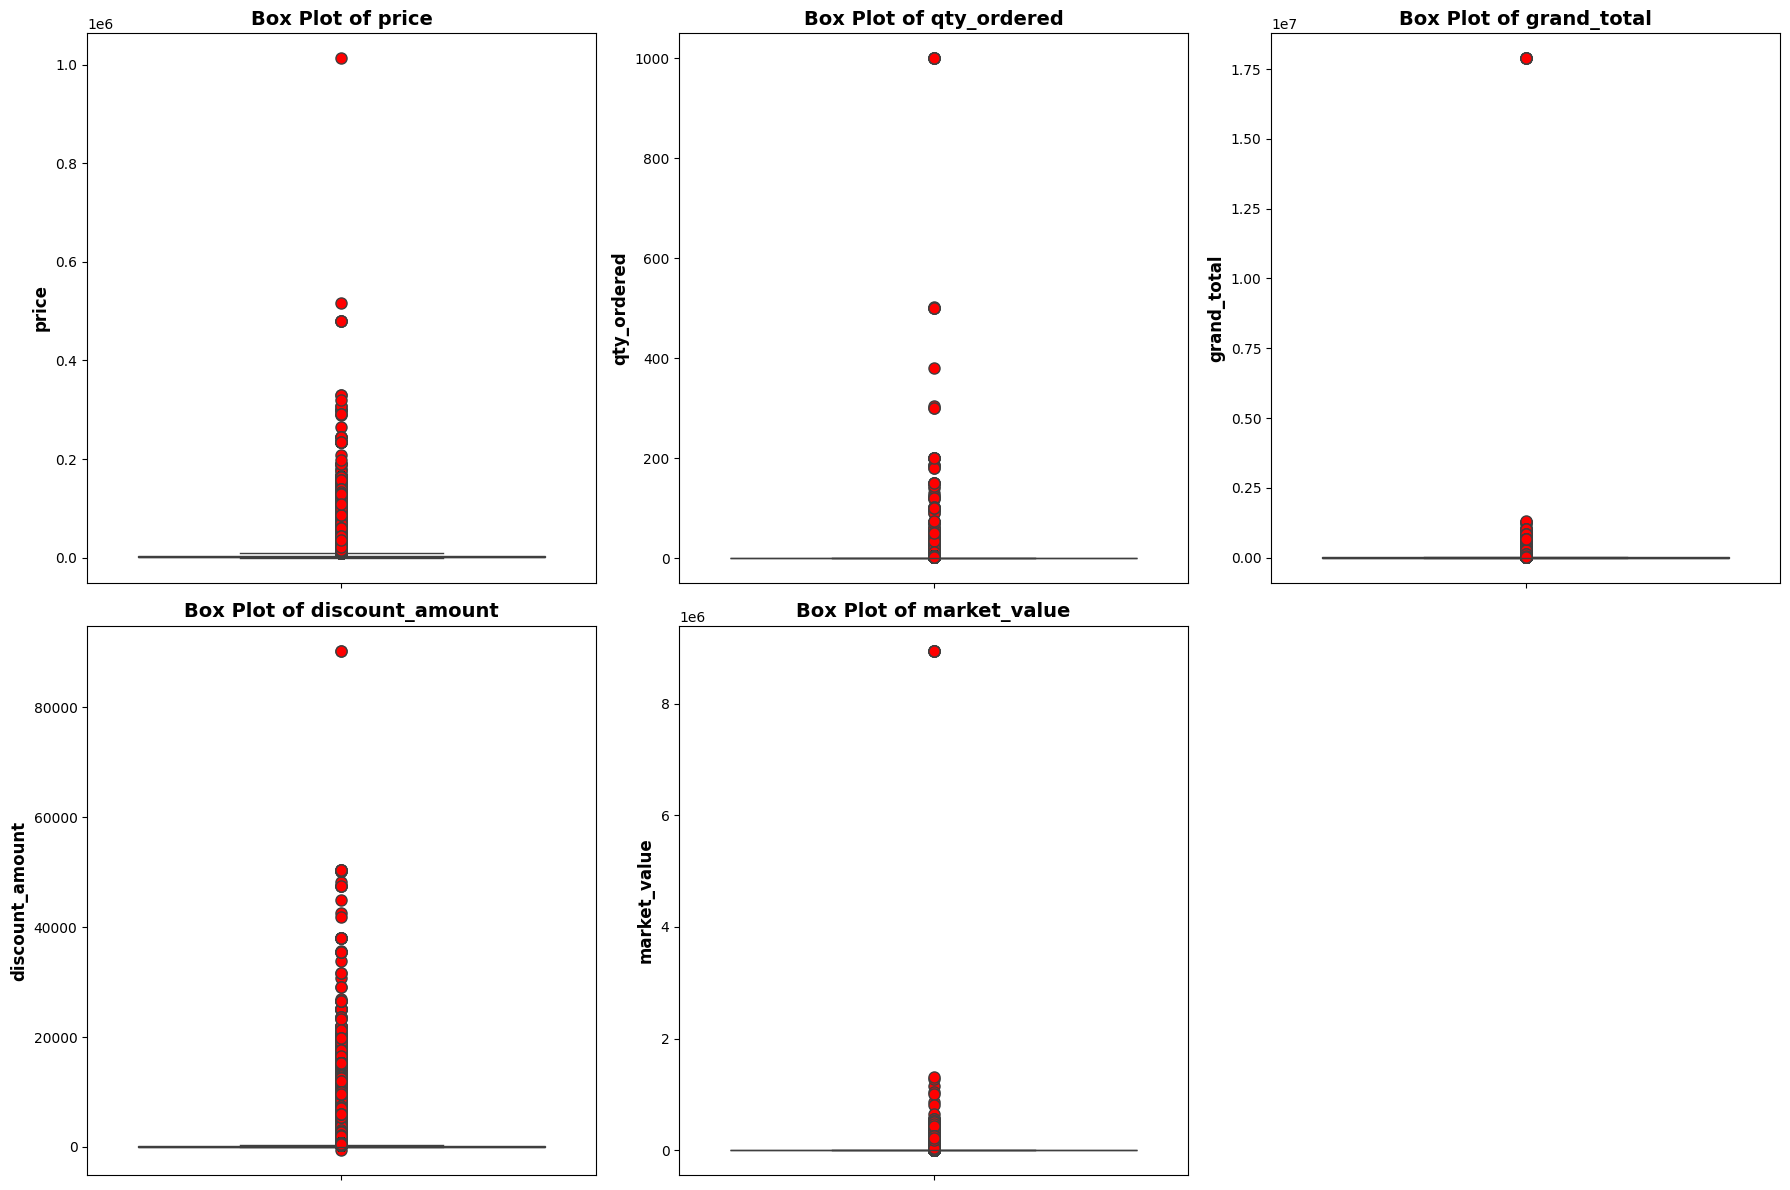

In [39]:
# Set the size of the entire figure
plt.figure(figsize=(18, 12))

# List of columns to plot
columns_to_plot = ['price', 'qty_ordered', 'grand_total', 'discount_amount', 'market_value']

# Loop through each column and create a subplot
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # Create a subplot with 2 rows and 3 columns
    sns.boxplot(data=data, y=column, flierprops={'marker': 'o', 'markersize': 8, 'markerfacecolor': 'red'}) # Boxplot
    plt.title(f'Box Plot of {column}', fontsize=14, fontweight='bold')
    plt.ylabel(column, fontsize=12, fontweight='bold')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

**Outlier Detection for Individual Columns**

In [40]:
# Function to find outliers using IQR
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Function to find outliers using Z-score
def find_outliers_zscore(data, column):
    z_scores = stats.zscore(data[column])
    abs_z_scores = np.abs(z_scores)
    outliers = data[abs_z_scores > 3]
    return outliers

# Find outliers using IQR method
iqr_outliers = find_outliers_iqr(data, 'price')
print(f'IQR Method: Found {iqr_outliers.shape[0]} outliers in "price" column\n')

# Find outliers using Z-score method
zscore_outliers = find_outliers_zscore(data, 'price')
print(f'Z-score Method: Found {zscore_outliers.shape[0]} outliers in "price" column')

IQR Method: Found 105683 outliers in "price" column

Z-score Method: Found 14503 outliers in "price" column


**Outlier Detection in Whole Data**

In [41]:
# outliers using z-score method
z = np.abs(stats.zscore(data[['price', 'qty_ordered', 'grand_total', 'discount_amount', 'market_value']]))
outliers = (z > 3).sum()
print(f"There are total {outliers.sum()} outliers in 'price', 'qty_ordered', 'grand_total', 'discount_amount' & 'market_value' columns using Z-score method \n")


# outliers using iqr method
Q1 = data[['price', 'qty_ordered', 'grand_total', 'discount_amount', 'market_value']].quantile(0.25)
Q3 = data[['price', 'qty_ordered', 'grand_total', 'discount_amount', 'market_value']].quantile(0.75)
IQR = Q3 - Q1
outliers = (data[['price', 'qty_ordered', 'grand_total', 'discount_amount', 'market_value']] < (Q1 - 1.5 * IQR)) | (data[['price', 'qty_ordered', 'grand_total', 'discount_amount', 'market_value']] > (Q3 + 1.5 * IQR))
print(f"There are total {outliers.sum().sum()} outliers in 'price', 'qty_ordered', 'grand_total', 'discount_amount' & 'market_value' columns using IQR method")

There are total 32030 outliers in 'price', 'qty_ordered', 'grand_total', 'discount_amount' & 'market_value' columns using Z-score method 

There are total 474045 outliers in 'price', 'qty_ordered', 'grand_total', 'discount_amount' & 'market_value' columns using IQR method


In [42]:
# see data after cleaning
data.sample(10, random_state=42)

,item_id,status,created_at,stock_keeping_unit,price,qty_ordered,grand_total,increment_id,category_name,discount_amount,payment_method,working_date,bi_status,market_value,year,month,customer_since,fiscal_year,customer_id
168651,424085,complete,2016-08-01,Lala_USS17-LAC-010A,950,1,1900,100280550,Women's Fashion,0,cod,2017-03-18,Net,950,2017,3,2016-08-01,2017,2478
410446,707223,complete,2017-12-01,MATIDR59BA5107902DF,6700,1,6700,100432437,Mobiles & Tablets,0,cod,2017-12-03,Net,6700,2017,12,2017-12-01,2018,82217
135209,380797,complete,2016-11-01,Kashmina_ST-MX-PK,675,1,1374,100256293,Women's Fashion,0,jazzvoucher,2017-01-03,Net,675,2017,1,2016-11-01,2017,19405
526370,841067,canceled,2017-07-01,ENTECO5A0C00E345122,20399,1,18335,100523157,Entertainment,2063,jazzvoucher,2018-05-08,Gross,20399,2018,5,2017-07-01,2018,55517
32215,251048,canceled,2016-09-01,Haier_Esteem V4,17999,1,16199,100174744,Mobiles & Tablets,1799,Payaxis,2016-09-30,Gross,17999,2016,9,2016-09-01,2017,8475
92892,326035,complete,2016-09-01,Bold_Bold-EPIC,195,1,390,100223975,Beauty & Grooming,0,cod,2016-11-25,Net,195,2016,11,2016-09-01,2017,9218
448023,750112,canceled,2018-02-01,OTHPCB5A7D845FA58AB,6000,1,6000,100456457,Others,0,jazzwallet,2018-02-17,Gross,6000,2018,2,2018-02-01,2018,89057
470908,776081,order_refunded,2018-03-01,COMCOO59ACF60D05659,2564,1,2564,100473925,Computing,0,cod,2018-03-08,Valid,2564,2018,3,2018-03-01,2018,93600
83536,314508,complete,2016-11-01,NVC_EE Power Bank 2600 mah,410,1,287,100216744,Mobiles & Tablets,123,jazzvoucher,2016-11-24,Net,410,2016,11,2016-11-01,2017,19595
419712,718263,canceled,2017-12-01,MATSAM59B7EAE1D2916,28351,2,56702,100438391,Mobiles & Tablets,0,Easypay,2017-12-18,Gross,56702,2017,12,2017-12-01,2018,83621


> ## **Features Creation**

In [43]:
# Order Value per Item
data['price_per_unit'] = data['price'] / data['qty_ordered']

# Discount Percentage (handle division by zero and NaNs)
data['discount_percentage'] = (data['discount_amount'] / data['price'].replace(0, np.nan)) * 100
data['discount_percentage'].fillna(0, inplace=True)

# Customer Tenure in Days
data['customer_tenure_days'] = (data['created_at'] - data['customer_since']).dt.days

# Map month numbers to month names
month_name_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
data['month_name'] = data['month'].map(month_name_mapping)

print("4 new features created successfully.")


4 new features created successfully.


**Correlation**

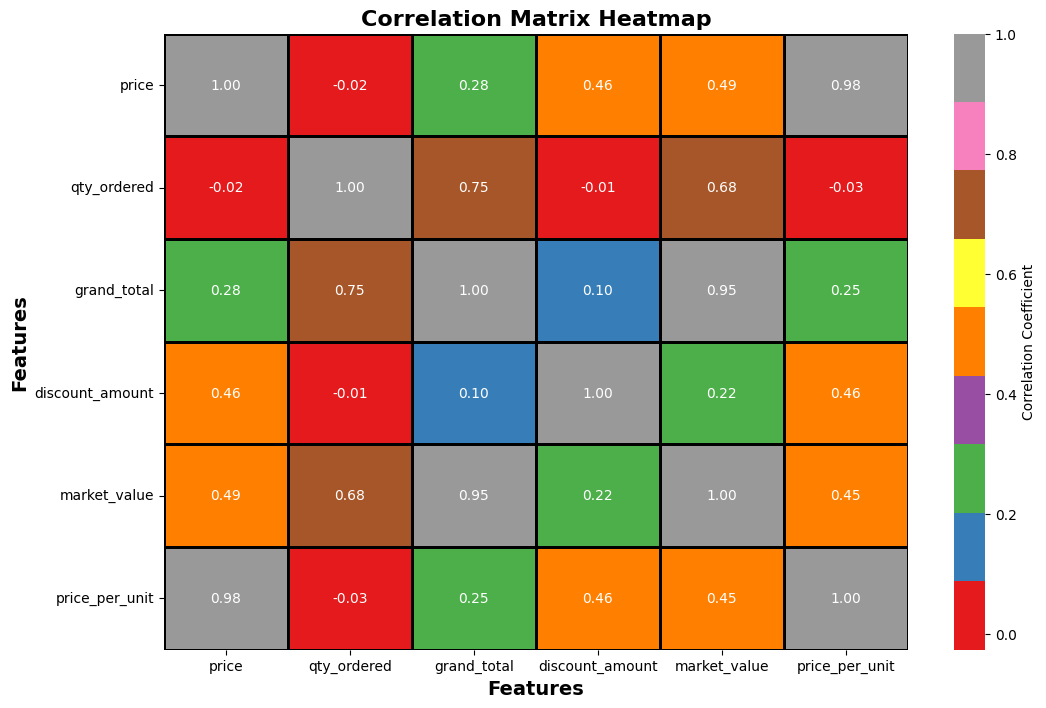

In [44]:
# Select the columns for the correlation matrix
columns_for_correlation = ['price', 'qty_ordered', 'grand_total', 'discount_amount', 'market_value', 'price_per_unit']

# Calculate the correlation matrix
correlation_matrix = data[columns_for_correlation].corr()

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a heatmap with customizations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Set1", linewidths=1, linecolor='black', cbar_kws={'label': 'Correlation Coefficient'})

# Add title and labels
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=14, fontweight='bold')
plt.ylabel('Features', fontsize=14, fontweight='bold')

# Show the plot
plt.show()

> ## **Taking Insights**

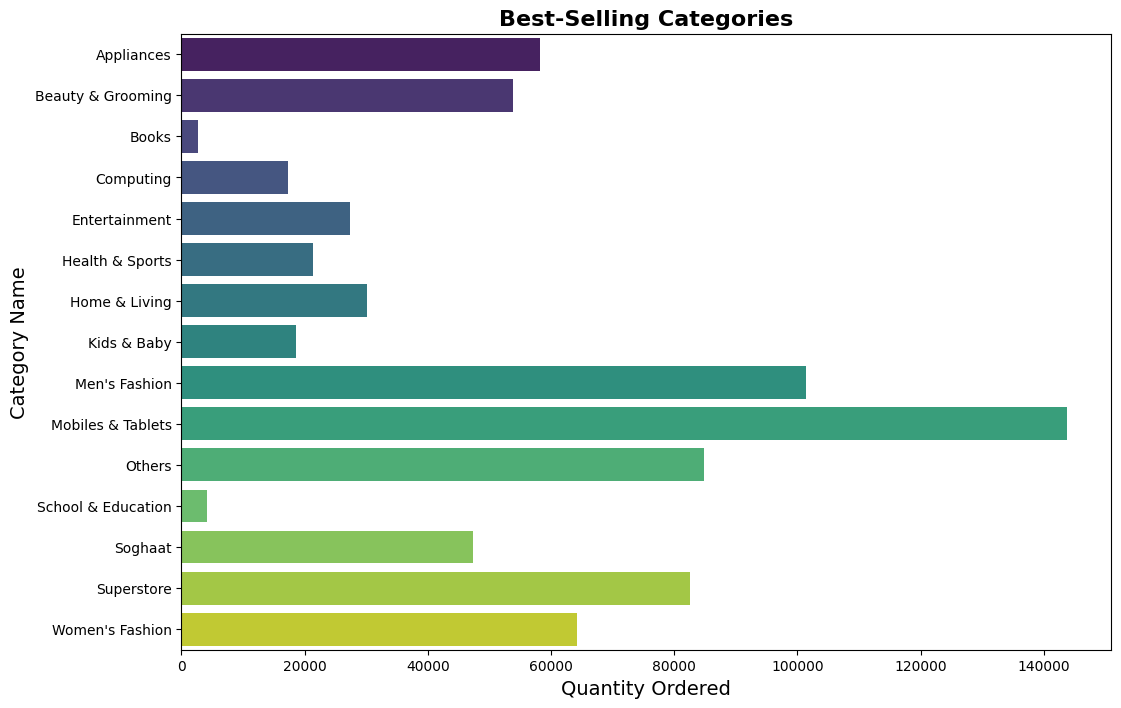

The category with the highest number of orders is 'Mobiles & Tablets' 


In [45]:
# Group by category_name and sum the qty_ordered
category_sales = data.groupby('category_name')['qty_ordered'].sum().reset_index()

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='qty_ordered', y='category_name', data=category_sales, palette='viridis')
plt.title('Best-Selling Categories', fontsize=16, fontweight='bold')
plt.xlabel('Quantity Ordered', fontsize=14)
plt.ylabel('Category Name', fontsize=14)
plt.show()

print("The category with the highest number of orders is 'Mobiles & Tablets' ")

**Visualize Payment Method& Order Status Frequency**

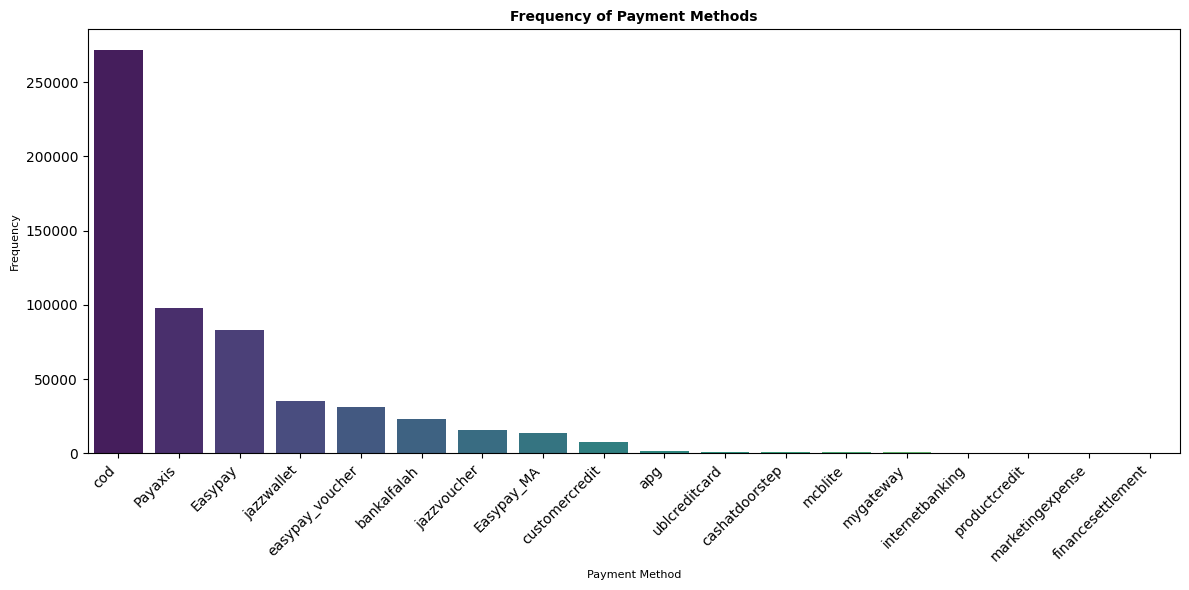

The most common payment method is likely 'COD' (Cash on Delivery)


In [46]:
# Visualize payment method frequency
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='payment_method', palette='viridis', order=data['payment_method'].value_counts().index)
plt.title('Frequency of Payment Methods', fontsize=10, fontweight='bold')
plt.xlabel('Payment Method', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("The most common payment method is likely 'COD' (Cash on Delivery)")

**Visualize Order status Frequency**

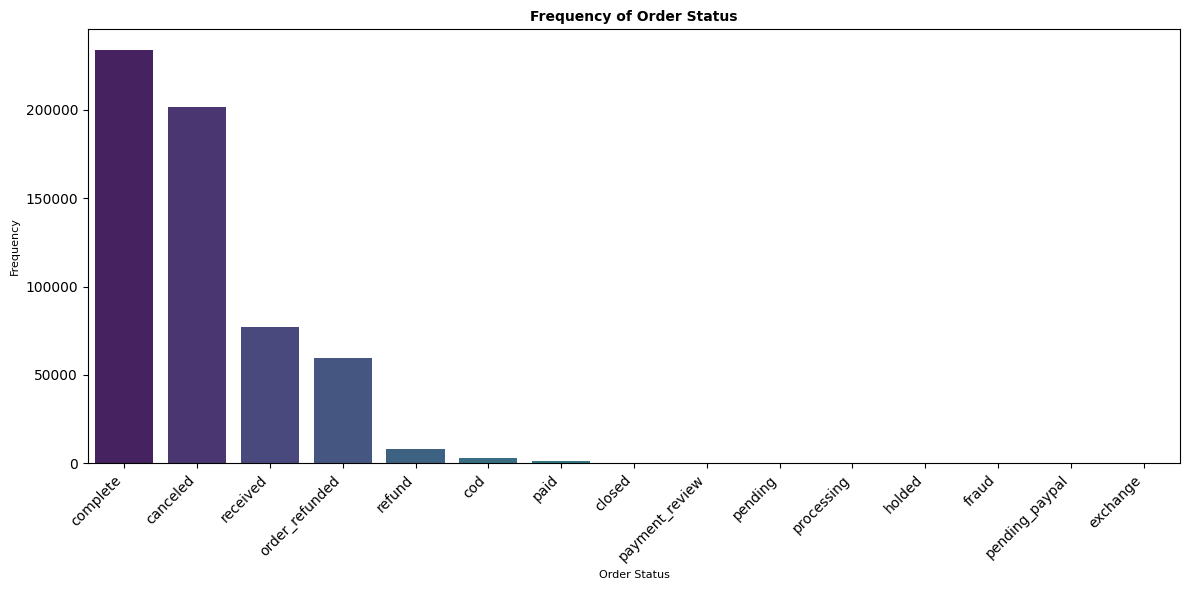

The most frequent order status is likely 'complete', followed by 'canceled' 


In [47]:
# Visualize Order status Frequency
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='status', palette='viridis', order=data['status'].value_counts().index)
plt.title('Frequency of Order Status', fontsize=10, fontweight='bold')
plt.xlabel('Order Status', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("The most frequent order status is likely 'complete', followed by 'canceled' ")

**Correlation Between Payment Method & Order Status**

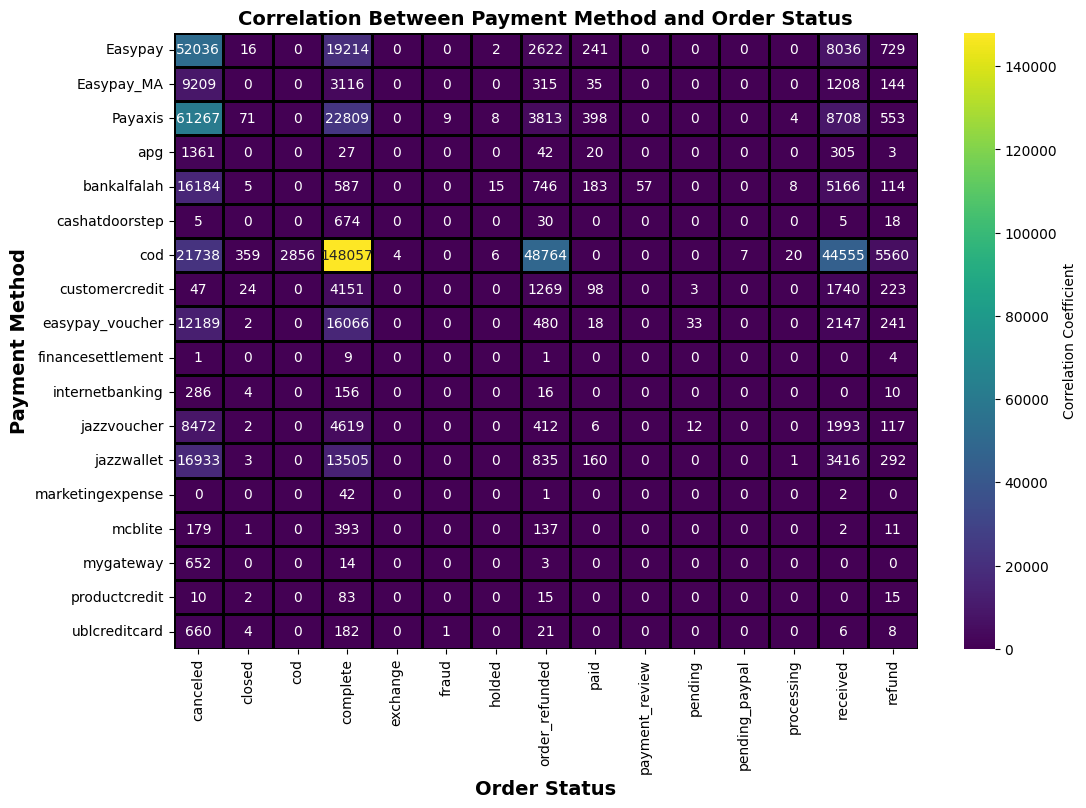

Likelihood Payment 'COD' & Easypay Have More Canceled Order


In [48]:
# Cross-tabulation of Payment Method and Order Status
payment_status = pd.crosstab(data['payment_method'], data['status'])

# Heatmap
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a heatmap with customizations
sns.heatmap(payment_status, annot=True, fmt="d", cmap="viridis", linewidths=1, linecolor='black', cbar_kws={'label': 'Correlation Coefficient'})

# Add title and labels
plt.title('Correlation Between Payment Method and Order Status', fontsize=14, fontweight='bold')
plt.xlabel('Order Status', fontsize=14, fontweight='bold')
plt.ylabel('Payment Method', fontsize=14, fontweight='bold')

# Display plot
plt.show()

print("Likelihood Payment 'COD' & Easypay Have More Canceled Order")

**Correlation Between Order Date and Item Category**

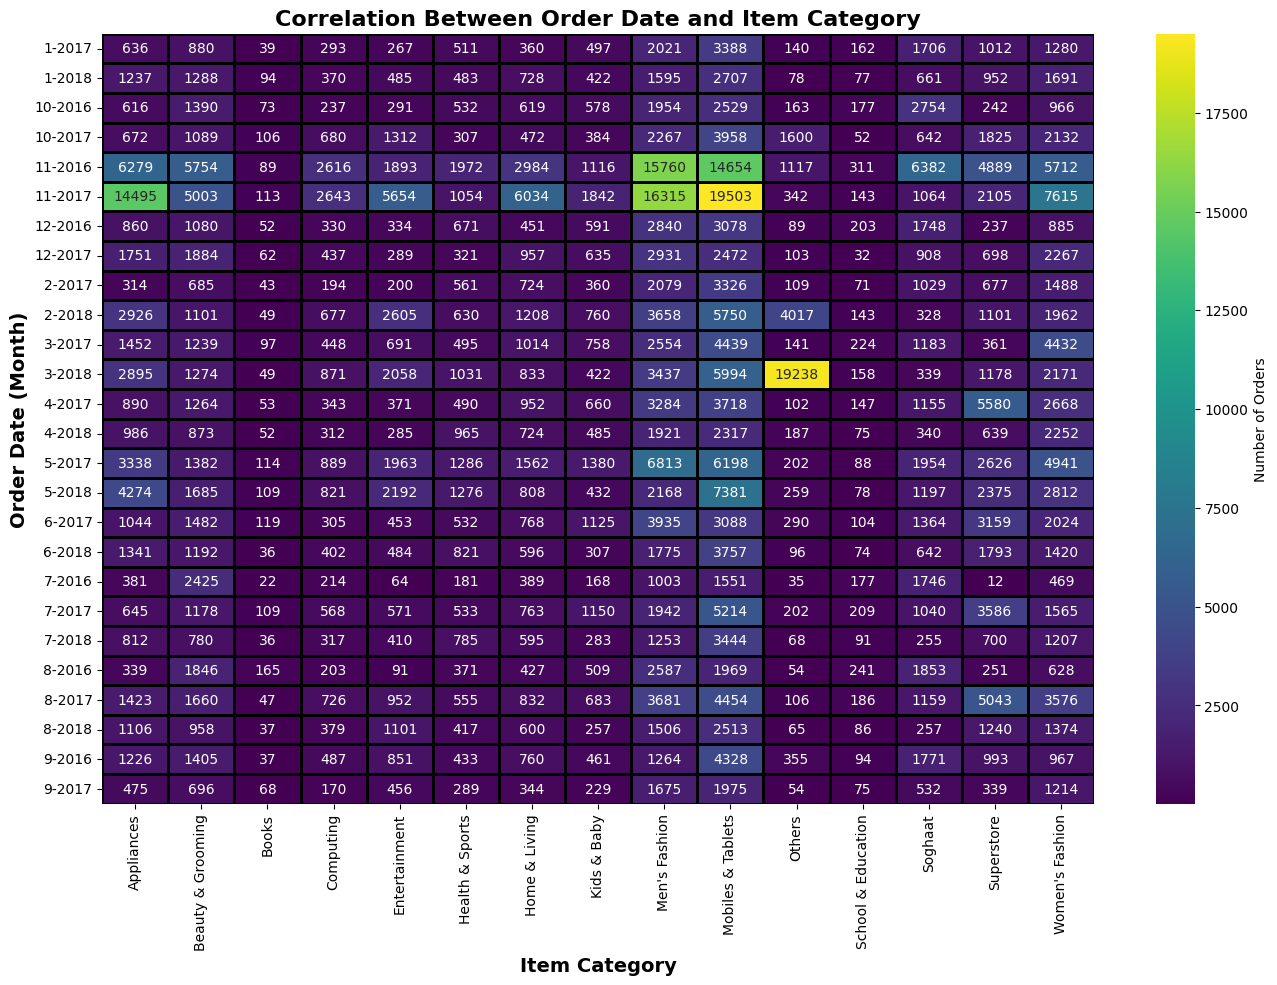

 ('Mobiles & Tablets') peak during '11-2017' 


In [49]:
# in start of data cleaning part i droped this column. Now i am creating again because i need this column
data['month_year'] = data['month'].astype(str) + '-' + data['year'].astype(str)

# Create a pivot table to count the number of orders for each category by month and year
category_month = data.groupby(['month_year', 'category_name']).size().unstack()

# Set the size of the plot
plt.figure(figsize=(16, 10))

# Create a heatmap with customizations
sns.heatmap(category_month, annot=True, fmt="d", cmap='viridis', linewidths=1, linecolor='black', cbar_kws={'label': 'Number of Orders'})

# Add title and labels
plt.title('Correlation Between Order Date and Item Category', fontsize=16, fontweight='bold')
plt.xlabel('Item Category', fontsize=14, fontweight='bold')
plt.ylabel('Order Date (Month)', fontsize=14, fontweight='bold')

# Show the plot
plt.show()

print(" ('Mobiles & Tablets') peak during '11-2017' ")

**Hidden Patterns That Are Counter-Intuitive For a Layman**

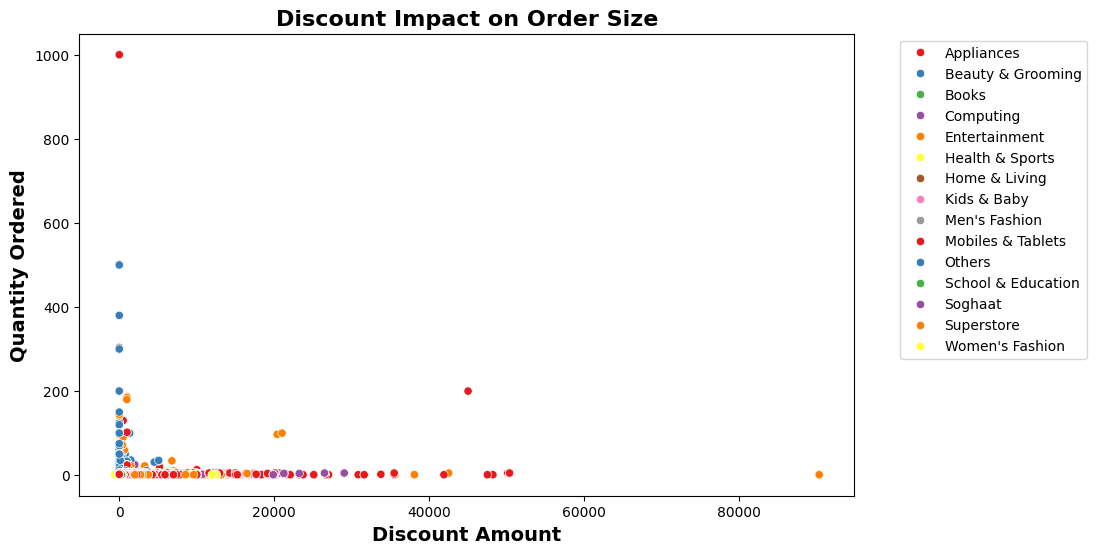

Higher discounts do not always lead to larger order quantities


In [50]:
# Hidden Pattern: Discount Impact on Order Size
plt.figure(figsize=(10, 6)) # Fig size

# create scatterplot
sns.scatterplot(x='discount_amount', y='qty_ordered', data=data, hue='category_name', palette='Set1')

# Add title and labels
plt.title('Discount Impact on Order Size', fontsize=16, fontweight='bold')
plt.xlabel('Discount Amount', fontsize=14, fontweight='bold')
plt.ylabel('Quantity Ordered', fontsize=14, fontweight='bold')

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display plot
plt.show()

print('Higher discounts do not always lead to larger order quantities')

**Predict number of orders, or item category or number of customers/amount in advance**

> ## **Model Building**

In [52]:
from sklearn.model_selection import train_test_split
Features = ['price', 'market_value', 'grand_total', 'discount_amount', 'market_value', 'price_per_unit']
X = data[Features]
y = data['qty_ordered']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.preprocessing import StandardScaler
# Scale features for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define base models with their best parameters (you should replace these with your GridSearchCV best params)
base_models = [
    ('linear', LinearRegression()),
    ('ridge', Ridge(alpha=1.0)),  # Replace with your best alpha
    ('lasso', Lasso(alpha=0.1)),  # Replace with your best alpha
    ('elastic', ElasticNet(alpha=0.1, l1_ratio=0.5)),  # Replace with your best params
    ('dt', DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_samples_leaf=1)),  # Replace with your best params
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)),  # Replace with your best params
    ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)),  # Replace with your best params
    ('ada', AdaBoostRegressor(n_estimators=100, learning_rate=0.1)),  # Replace with your best params
    ('et', ExtraTreesRegressor(n_estimators=100, max_depth=None, min_samples_split=2)),  # Replace with your best params
    ('svr', SVR(C=1.0, epsilon=0.1, kernel='rbf')),  # Replace with your best params
    ('knn', KNeighborsRegressor(n_neighbors=5, weights='uniform', p=2)),  # Replace with your best params
    ('xgb', XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, subsample=1.0, colsample_bytree=1.0)),  # Replace with your best params
    ('lgbm', LGBMRegressor(n_estimators=100, max_depth=-1, learning_rate=0.1, num_leaves=31)),  # Replace with your best params
    ('cat', CatBoostRegressor(iterations=100, depth=3, learning_rate=0.1, l2_leaf_reg=1, verbose=0))  # Replace with your best params
]

# Define meta-model
meta_model = LinearRegression()  # You can also try other models like Ridge or XGBoost

# Create stacking ensemble
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1  # Use all available cores
)

# Define the preprocessor
# Assuming you want to use StandardScaler
from sklearn.preprocessing import StandardScaler
preprocessor = StandardScaler()

# Pipeline with stacking
stacking_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('stacking', stacking_model)
])

# Evaluate
scores = cross_val_score(stacking_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Stacking MSE: {-scores.mean():.4f} (±{scores.std():.4f})")

**Evaluation**

In [ ]:
def evaluation(stacking_pipeline, X_test, y_test):
    results = []

    for name, model in stacking_pipeline.items():
        y_pred = stacking_pipeline.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        results.append({
            'Model': name,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2 Score': r2
        })

        print(f"{name} Evaluation:")
        print(f"  MAE: {mae:.4f}")
        print(f"  MSE: {mse:.4f}")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  R2 Score: {r2:.4f}\n")

    return results
stacking_pipeline.fit(X_train, y_train)
evaluation_results = evaluation(stacking_pipeline, X_test, y_test)